In [7]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [8]:
# Import the dataset

In [9]:
data = pd.read_csv("E:/Hello Tech DS Project/Data sets/Student Performance dataset - Classification based/Student_performance_data _.csv")

In [10]:
# Display first 10 rows

In [11]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [12]:
# Display last 10 rows

In [13]:
data.tail(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [14]:
# Finding the Total number of rows and columns

In [15]:
data.shape

(2392, 15)

# DATA PREPROCESSING

In [16]:
# Checking null values

In [17]:
data.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [18]:
# Removing empty rows

In [19]:
data.dropna(inplace=True)

In [20]:
# After removing the empty rows 

In [21]:
data.shape

(2392, 15)

In [22]:
# Feature Scaling 

In [23]:
numerical_features = ['Age','StudyTimeWeekly','Absences','GPA']
scaler = StandardScaler()

In [24]:
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,0.472919,1,0,2,1.780336,-0.890822,1,2,0,0,1,0,1.118086,2.0
1,1002,1.362944,0,0,1,0.997376,-1.717694,0,1,0,0,0,0,1.242374,1.0
2,1003,-1.307132,0,2,3,-0.984045,1.353542,0,2,0,0,0,0,-1.960277,4.0
3,1004,0.472919,1,0,3,0.045445,-0.063951,0,3,1,0,0,0,0.161790,3.0
4,1005,0.472919,1,0,2,-0.902311,0.290422,1,3,0,0,0,0,-0.675573,4.0


# EXPLORATORY DATA ANALYSIS (EDA)

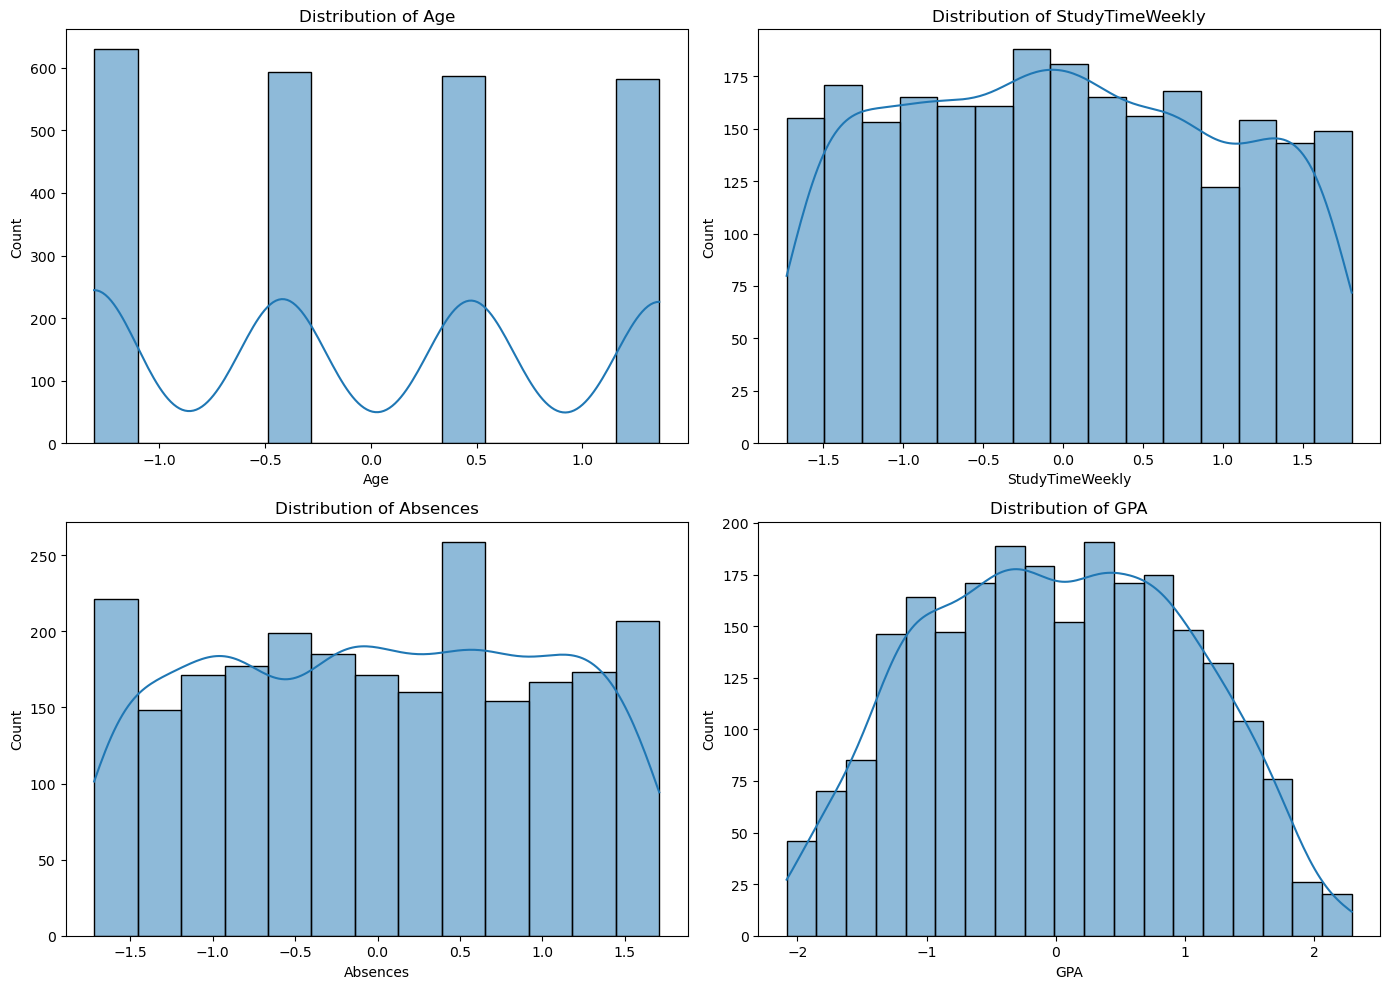

In [25]:
plt.figure(figsize=(14,10))
for i,feature in enumerate(numerical_features,1):
    plt.subplot(2,2,i)
    sns.histplot(data[feature],kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [26]:
# Correction Matrix

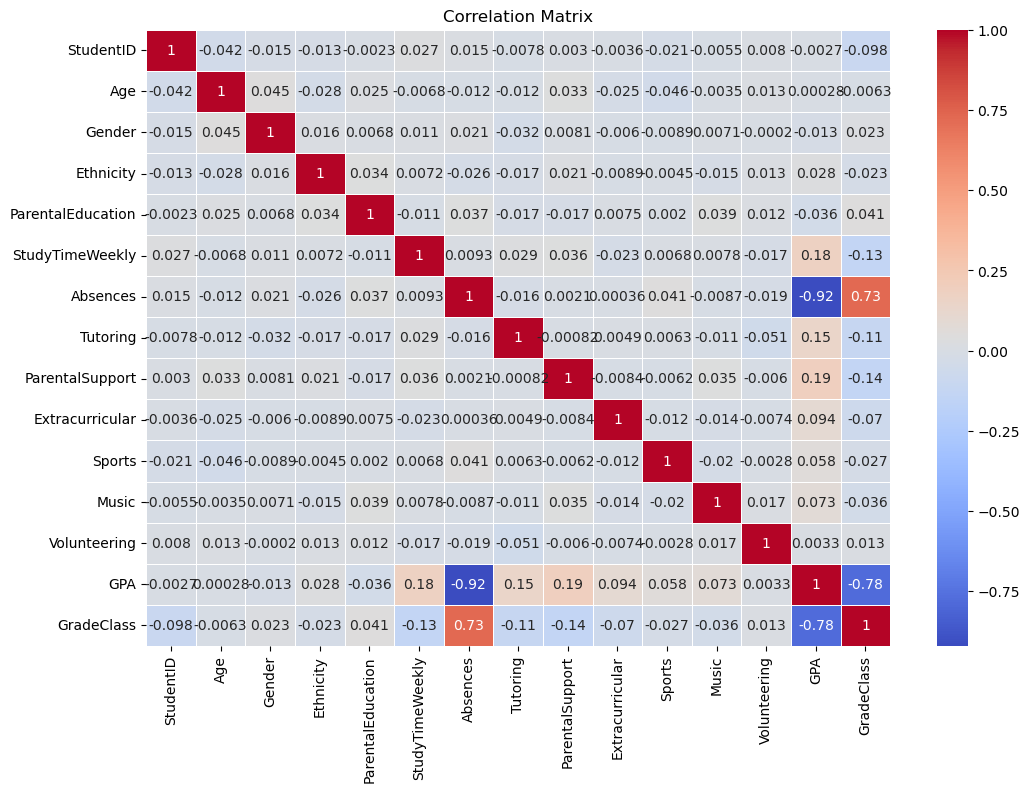

In [27]:
plt.figure(figsize=(12,8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot = True, cmap = 'coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Box plots for Categorical Features

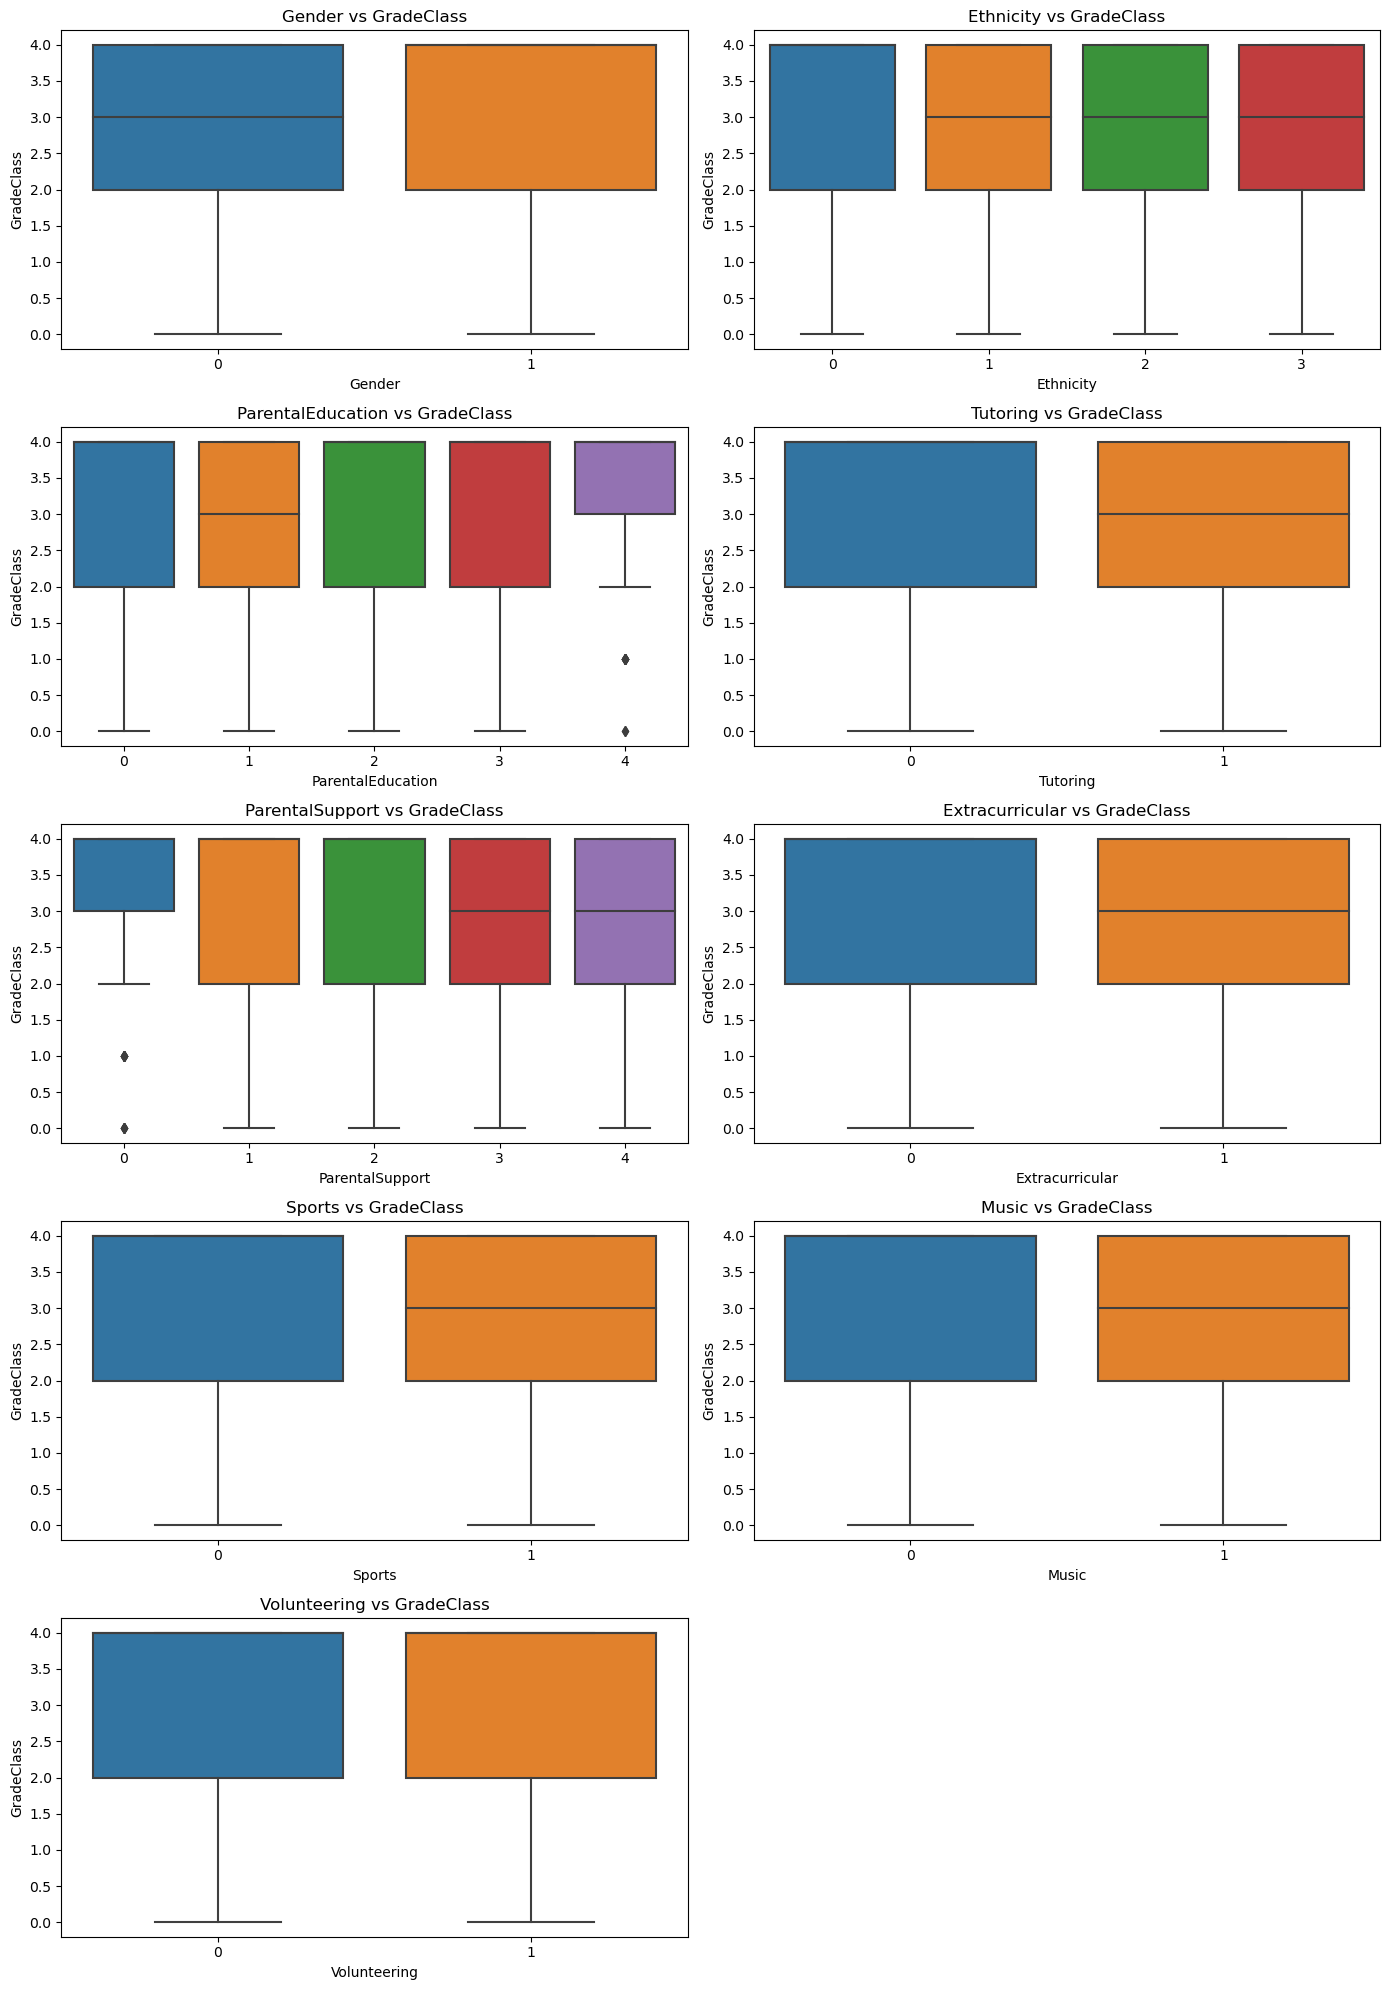

In [29]:
categorical_features = ['Gender','Ethnicity','ParentalEducation','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering']
plt.figure(figsize=(14,20))
for i,feature in enumerate(categorical_features,1):
    plt.subplot(5,2,i)
    sns.boxplot(x=data[feature],y=data['GradeClass'])
    plt.title(f'{feature} vs GradeClass')
plt.tight_layout()
plt.show()

# MODEL SELECTION & TRAINING

In [30]:
# Split the data

In [31]:
x=data.drop(['StudentID','GradeClass'],axis=1)
y=data['GradeClass']

In [32]:
# Splitting the data into training and testing sets

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# RANDOM FOREST CLASSIFIER

In [34]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

# LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42,max_iter=1000)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

# SUPPORT VECTOR MACHINE (SVM)

In [36]:
from sklearn.svm import SVC as SVM
SVM = SVM(random_state= 42)
SVM.fit(x_train, y_train)

SVC(random_state=42)

# K-NEAREST NEIGBOUR (KNN)

In [37]:
from sklearn.neighbors import KNeighborsClassifier as KNN

KNN = KNN()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

# DECISION TREE CLASSIFIER

In [38]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

# Model Evaluation 

In [ ]:
1. Random Forest Classifier

Accuracy: 0.91
Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.45      0.59        22
         1.0       0.81      0.88      0.84        49
         2.0       0.94      0.87      0.90        85
         3.0       0.89      0.90      0.89        86
         4.0       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.82      0.84       479
weighted avg       0.91      0.91      0.91       479



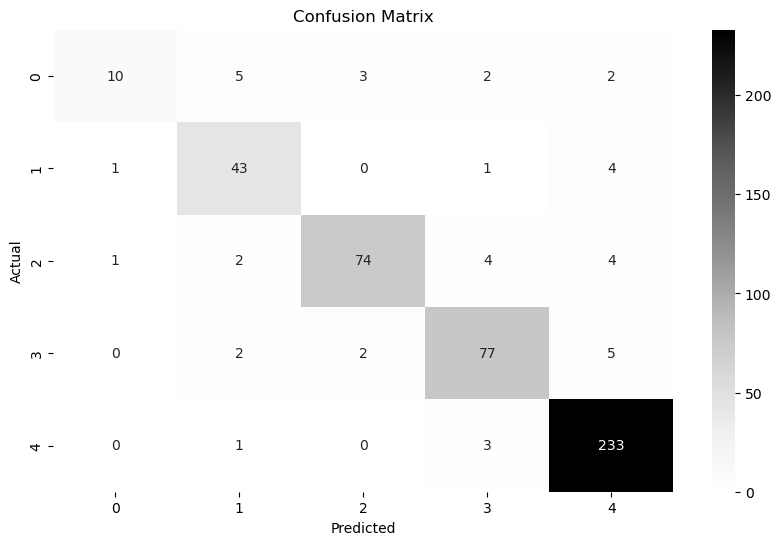

In [49]:
# Make predictions
y_pred = RFC.predict(x_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#Classification Report
print("Classification Report")
print(classification_report(y_test, y_pred))
    
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True, fmt='d', cmap='Greys')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
2. Logistic Regression

Logistic Regression Accuracy: 0.75
Logistic Regression Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.43      0.47      0.45        49
         2.0       0.60      0.62      0.61        85
         3.0       0.71      0.57      0.63        86
         4.0       0.88      0.98      0.93       237

    accuracy                           0.75       479
   macro avg       0.53      0.53      0.52       479
weighted avg       0.71      0.75      0.73       479



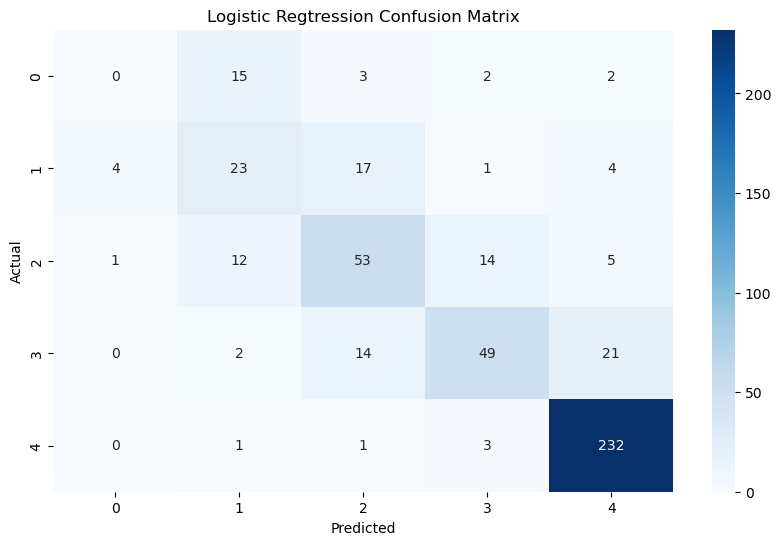

In [50]:
# Make prediction
y_pred=LR.predict(x_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

#Classification Report
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred))
    
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regtression Confusion Matrix")
plt.show()

In [ ]:
3. Support Vector Machine(SVM)

SVM: 0.75
SVM Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.43      0.47      0.45        49
         2.0       0.60      0.62      0.61        85
         3.0       0.71      0.57      0.63        86
         4.0       0.88      0.98      0.93       237

    accuracy                           0.75       479
   macro avg       0.53      0.53      0.52       479
weighted avg       0.71      0.75      0.73       479



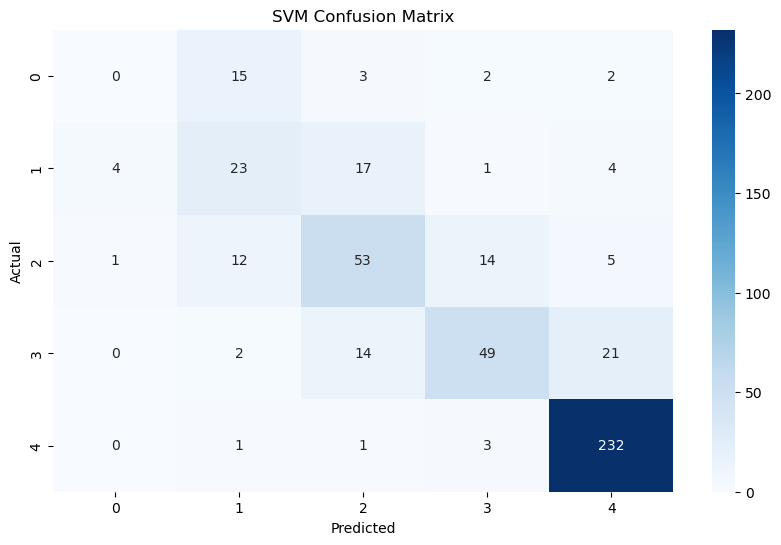

In [59]:
# Make prediction
y_pred=LR.predict(x_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM: {accuracy:.2f}')

#Classification Report
print("SVM Classification Report")
print(classification_report(y_test, y_pred))
    
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

In [ ]:
4. k-Nearest Neighbors

KNN Accuracy: 0.75
KNN Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.43      0.47      0.45        49
         2.0       0.60      0.62      0.61        85
         3.0       0.71      0.57      0.63        86
         4.0       0.88      0.98      0.93       237

    accuracy                           0.75       479
   macro avg       0.53      0.53      0.52       479
weighted avg       0.71      0.75      0.73       479



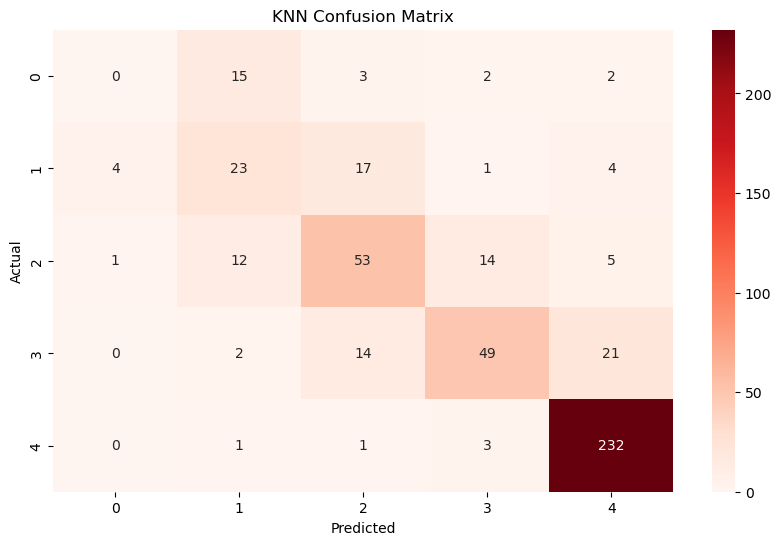

In [62]:
# Make prediction
y_pred=LR.predict(x_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy:.2f}')

#Classification Report
print("KNN Classification Report")
print(classification_report(y_test, y_pred))
    
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

In [ ]:
5. Decision Tree Classifier

Decison Tree Accuracy : 0.75
Decison Tree Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.43      0.47      0.45        49
         2.0       0.60      0.62      0.61        85
         3.0       0.71      0.57      0.63        86
         4.0       0.88      0.98      0.93       237

    accuracy                           0.75       479
   macro avg       0.53      0.53      0.52       479
weighted avg       0.71      0.75      0.73       479



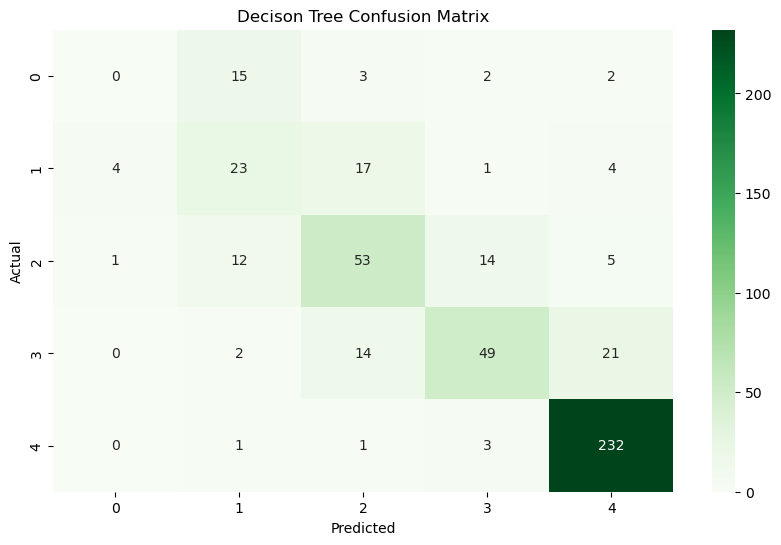

In [63]:
# Make prediction
y_pred=LR.predict(x_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Decison Tree Accuracy : {accuracy:.2f}')

#Classification Report
print("Decison Tree Classification Report")
print(classification_report(y_test, y_pred))
    
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decison Tree Confusion Matrix")
plt.show()